In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
"""
0. Prepare Data
1. Model
2. Loss and Optimizer
3. Training Loop
"""

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

print(X)
print(y)

tensor([[-0.6118],
        [-0.2494],
        [ 0.4885],
        [ 0.7620],
        [ 1.5198],
        [ 0.3776],
        [ 0.5129],
        [-0.6712],
        [-1.3965],
        [ 0.3156],
        [-0.6370],
        [-0.3968],
        [-1.1006],
        [ 0.9009],
        [-1.0999],
        [ 0.8280],
        [-0.0756],
        [-0.3522],
        [-0.6707],
        [-1.0730],
        [-0.3062],
        [ 2.1856],
        [ 0.8654],
        [ 0.1983],
        [-0.3841],
        [-0.6837],
        [ 0.0508],
        [ 0.5828],
        [ 1.2529],
        [-0.7544],
        [-0.3493],
        [-0.8876],
        [ 0.1866],
        [ 0.8762],
        [ 0.8390],
        [-0.5045],
        [-0.3439],
        [ 1.6925],
        [-2.3015],
        [ 0.9311],
        [ 2.1003],
        [ 1.4621],
        [-0.8452],
        [-0.8779],
        [-0.3224],
        [ 0.8851],
        [ 0.1600],
        [ 1.1316],
        [-0.3753],
        [ 0.5025],
        [-0.2089],
        [ 0.1202],
        [ 0.

In [3]:
n_samples, n_features = X.shape
print(X.shape)

torch.Size([100, 1])


In [4]:
# 1. Model
input_size, output_size = n_features, 1
print(input_size, output_size)
model = nn.Linear(input_size, output_size)
print(model)

1 1
Linear(in_features=1, out_features=1, bias=True)


In [5]:
# 2. Loss and Optimizer
alpha = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=alpha)
print(alpha, criterion, optimizer)

0.01 MSELoss() SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [7]:
# 3. Train
iterations = 100
for epoch in range(1, iterations + 1):
    # forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    # reset weights to zero
    optimizer.zero_grad()

    if epoch % 10 == 0:
        print(f"epoch: {epoch} - loss={loss.item():.4f}")

epoch: 10 - loss=4183.4399
epoch: 20 - loss=3124.9602
epoch: 30 - loss=2359.2529
epoch: 40 - loss=1804.7395
epoch: 50 - loss=1402.7668
epoch: 60 - loss=1111.1018
epoch: 70 - loss=899.2929
epoch: 80 - loss=745.3546
epoch: 90 - loss=633.3944
epoch: 100 - loss=551.9107


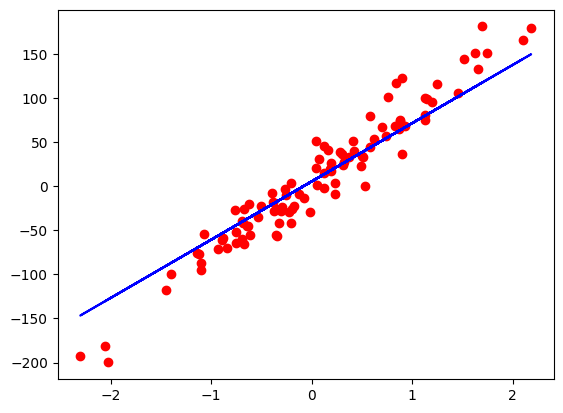

In [8]:
# plot
pred = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, pred, 'b')
plt.show()